## 📌ACTIVIDAD 2: UN CASO MÁS REAL

Crea el fichero u02_p03_a2_reglin_<tus_iniciales>.py. Vamos a trabajar con los datos del fichero "seguros_de_coches.csv" que utiliza una compañía aseguradora

Hay 3 tipos de características:
(a) La especificación de un automóvil en términos de diferentes características.

(b) Su calificación de riesgo de seguro asignada. Es un indicador del grado en que el automóvil es más problemático de lo que indica su precio. Inicialmente, a los automóviles se les asigna un símbolo de factor de riesgo asociado con su precio. Luego, si es más arriesgado (o menos), este símbolo se ajusta moviéndolo hacia arriba (o hacia abajo) en la escala. Los
profesionales llaman a este proceso “symboling”. Un valor de 3 indica que el automóvil es
riesgoso y -3 que probablemente sea bastante seguro.

(c) El pago medio relativo por pérdida por año de vehículo asegurado. Este valor está
normalizado para todos los automóviles dentro de una clasificación de tamaño particular (twodoor small, station wagons, sports/speciality, etc…) y representa la pérdida promedio por
automóvil por año.
Hay que tener en cuenta que los valores ausentes están definidos con un “?”.

Completa los siguientes pasos en el fichero Python comenzando por:

a) Cargar los datos en un Dataframe, (adapta la ruta al código de la siguiente figura).

b) Mostrar los 5 primeros ejemplos por pantalla (completa y obtén mismos resultados).

c) Muestra un resumen de las columnas del dataset (completa y obtén mismos resultados). 

#### Carga de Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Carga del Dataset en un Dataframe

In [3]:
#Carga del CSV
#df = pd.read_csv('seguros_de_coches.csv', na_values=["?"])
#Mostramos datos
#df.head()

columnas = ['symboling', 'perdidas_normal', 'marca', 'combustible', 'inyección',
            'puertas', 'chasis', 'traccion', 'lugar_de_motor', 'potencia_base',
            'longitud', 'anchura', 'altura', 'peso', 'tipo_motor',
            'cilindros', 'tamaño_motor', 'sistema', 'calibre', 'ataque',
            'ratio_compresion', 'potencia_cv', 'max_rpm', 'consumo_carretera', 'consumo_ciudad',
            'precio']

autos = pd.read_csv("seguros_de_coches.csv", header=None, names=columnas, na_values='?', delimiter=",")


autos.info()


autos.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   perdidas_normal    164 non-null    float64
 2   marca              201 non-null    object 
 3   combustible        201 non-null    object 
 4   inyección          201 non-null    object 
 5   puertas            199 non-null    object 
 6   chasis             201 non-null    object 
 7   traccion           201 non-null    object 
 8   lugar_de_motor     201 non-null    object 
 9   potencia_base      201 non-null    float64
 10  longitud           201 non-null    float64
 11  anchura            201 non-null    float64
 12  altura             201 non-null    float64
 13  peso               201 non-null    int64  
 14  tipo_motor         201 non-null    object 
 15  cilindros          201 non-null    object 
 16  tamaño_motor       201 non

(201, 26)

In [4]:
autos.head()


,symboling,perdidas_normal,marca,combustible,inyección,puertas,chasis,traccion,lugar_de_motor,potencia_base,...,tamaño_motor,sistema,calibre,ataque,ratio_compresion,potencia_cv,max_rpm,consumo_carretera,consumo_ciudad,precio
0,3,NaN,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


#### DATOS AUSENTES Y CATEGÓRICOS

Los datos se han cargado remplazando los símbolos “?” como valores ausentes NaN. como estaba definido en la información del dataset. Primero sumarizamos los datos ausentes por característica.

Luego nos podemos fijar en el listado que nos ha devuelto el método autos.info() y todas las que no tengan un tipo numérico (intX y floatX) serán categóricas de una u otra forma

In [5]:
# Valores ausentes y columnas categóricas
print("========== Valores ausentes: \n", autos.isna().sum())

cols_categoricas = ["marca", "sistema", "combustible","inyección","puertas","chasis","traccion","lugar_de_motor","tipo_motor","cilindros"]  # Completa el array!!!
autos[cols_categoricas] = autos[cols_categoricas].astype("category")

autos["puertas"] = pd.Categorical(autos["puertas"], categories=["two", "four"], ordered=True)
autos["cilindros"] = pd.Categorical(autos["cilindros"],
                                     categories=["two", "three", "four", "five", "six", "eight", "twelve"],
                                     ordered=True)
#autos[""]
print("========== Cambiamos a tipo category:\n", autos.info())

========== Valores ausentes: 
 symboling             0
perdidas_normal      37
marca                 0
combustible           0
inyección             0
puertas               2
chasis                0
traccion              0
lugar_de_motor        0
potencia_base         0
longitud              0
anchura               0
altura                0
peso                  0
tipo_motor            0
cilindros             0
tamaño_motor          0
sistema               0
calibre               4
ataque                4
ratio_compresion      0
potencia_cv           2
max_rpm               2
consumo_carretera     0
consumo_ciudad        0
precio                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   perdidas_normal    164 non-null    float64 
 2   marca              201 non

Se debe hacer un análisis de cada una de las variables y describir
sus propiedades. Realizar el análisis univariado es muy
importante para entender el comportamiento de cada una de las
variables y poder detectar posibles problemas en los datos. Nunca
hay que saltarse este paso. Por ejemplo vas a contar cuantas veces
aparece cada valor de las columnas categóricas. Aquellas
columnas que tengan valores que solamente aparezcan una vez,
las añades al array cols_categoricas_escasas

In [6]:

cols_categoricas_escasas = []

for col in cols_categoricas:
    value_counts = autos[col].value_counts()
    
    # Si existe al menos una categoría con solo 1 aparición, la columna se considera escasa
    if (value_counts == 1).any():
        cols_categoricas_escasas.append(col)

print("Columnas con valores escasos:", cols_categoricas_escasas)


for col in cols_categoricas:
    print(autos[col].value_counts())
    print("")
    


Columnas con valores escasos: ['marca', 'sistema', 'cilindros']
marca
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
alfa-romeo        3
jaguar            3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64

sistema
mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

combustible
gas       181
diesel     20
Name: count, dtype: int64

inyección
std      165
turbo     36
Name: count, dtype: int64

puertas
four    113
two      86
Name: count, dtype: int64

chasis
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

traccion
fwd    118
rwd    

Algunos valores categóricos solo aparecen en un único ejemplo, es el caso de la característica “marca”
donde “mercury” solamente aparece una vez y eso puede dar problemas a los encoders. Igual ocurre
con otras características. Una solución es ocuparse de estos casos en la fase de ingeniería de
características (es lo que haremos en este ejemplo). Pero se puede perder conocimiento.
Otra solución es añadir más datos (posibilidad que no tenemos) o encargarse de garantizar que
siempre estén estos ejemplos en el conjunto de entrenamiento. Este procedimiento necesita una
implementación más compleja. Podemos crearnos un dataset temporal y añadirlo a los datos de train
los ejemplos con valores escasos de manera artificial. Para ello creamos una condición para cada
característica que tenga estos valores escasos y podemos generar sus datos. Completa las dos
condiciones que faltan del siguiente código:


In [7]:
cond_1 = "sistema in ['mfi','spfi']"
cond_2 = "marca == 'mercury'"
cond_3 = "cilindros in ['three', 'twelve']"

#Estos registros se añaden en el conjunto de entrenamiento para evitar que se pierdan
#al hacer la división de los datos
unir_a_train = autos.query(f"{cond_1} | {cond_2} | {cond_3}")
#Mostramos
print("Datos que no debemos perder:\n", unir_a_train)


Datos que no debemos perder:
     symboling  perdidas_normal      marca combustible inyección puertas  \
17          2            121.0  chevrolet         gas       std     two   
28          3            145.0      dodge         gas     turbo     two   
43          2              NaN      isuzu         gas       std     two   
46          0              NaN     jaguar         gas       std     two   
72          1              NaN    mercury         gas     turbo     two   

       chasis traccion lugar_de_motor  potencia_base  ...  tamaño_motor  \
17  hatchback      fwd          front           88.4  ...            61   
28  hatchback      fwd          front           95.9  ...           156   
43  hatchback      rwd          front           96.0  ...           119   
46      sedan      rwd          front          102.0  ...           326   
72  hatchback      rwd          front          102.7  ...           140   

    sistema  calibre  ataque ratio_compresion potencia_cv  max_rpm  

### ESTUDIAR ESTADÍSTICAS DE PAREJAS VARIABLES

En primer lugar vamos a estudiar si todas las características numéricas influyen de manera lineal en el target. Podemos hacerlo de manera visual creando **Scatterplot()** de cada una con el target

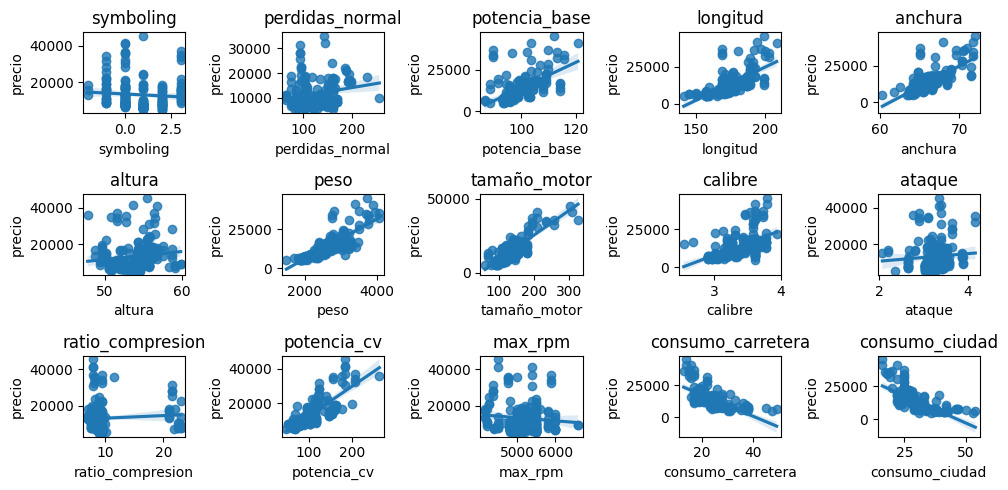

In [8]:
#===== Análisis bivariable
#generar listado de variables numéricas excepto target
cols_numericas = (autos.drop(columns=["precio"]).select_dtypes (include=np.number).columns.tolist())
n_cols_numericas = len(cols_numericas)  # Gráficos de regresión simple con target

import seaborn as sns
import math

fig, ejes = plt.subplots(math.ceil(n_cols_numericas / 5), 5, figsize=(10, 5)) # son 15, plot de 5 columnas
ejes = ejes.flatten()

for i, col in enumerate(cols_numericas):
    sns.regplot(data=autos, x=col, y="precio", ax=ejes[i])
    ejes[i].set_title(col)

plt.tight_layout()
plt.show()

##### Estudiar la correlación entre variables

La correlación lineal entre las variables predictoras que sean numéricas. Visualmente se puede ver en
las graficas como las anteriores pero realizadas entre cada par de predictoras o podemos hacer el
estudio de manera numérica creando una matriz de correlaciones. Vamos a usar esta segunda
aproximación, pero antes:
- La variable "tamaño_motor" tiene una relación lineal positiva con el target.
- Pero "symboling" no tiene relación lineal y por tanto el valor de la correlación no es válido

Como estamos interesados en la cantidad de correlación y no en si esta es positiva o negativa, lo que vamos a hacer es generar la matriz de correlaciones y transformarla en sus valores absolutos para visualizar mejor los posibles casos a contemplar.

Primero ponemos la característica target la primera para que la primera fila y la primera columna se vean claramente. 

Debería aparecer lo más oscura posible. Si es inferior a 0.1 (color claro cercano al blanco) es candidata a eliminarla como predictora.

Además, si encontramos correlaciones importantes con otras predictoras es que hay columnas con colinealidad y eso tampoco es bueno, podemos eliminar la que tenga menor correlación con target


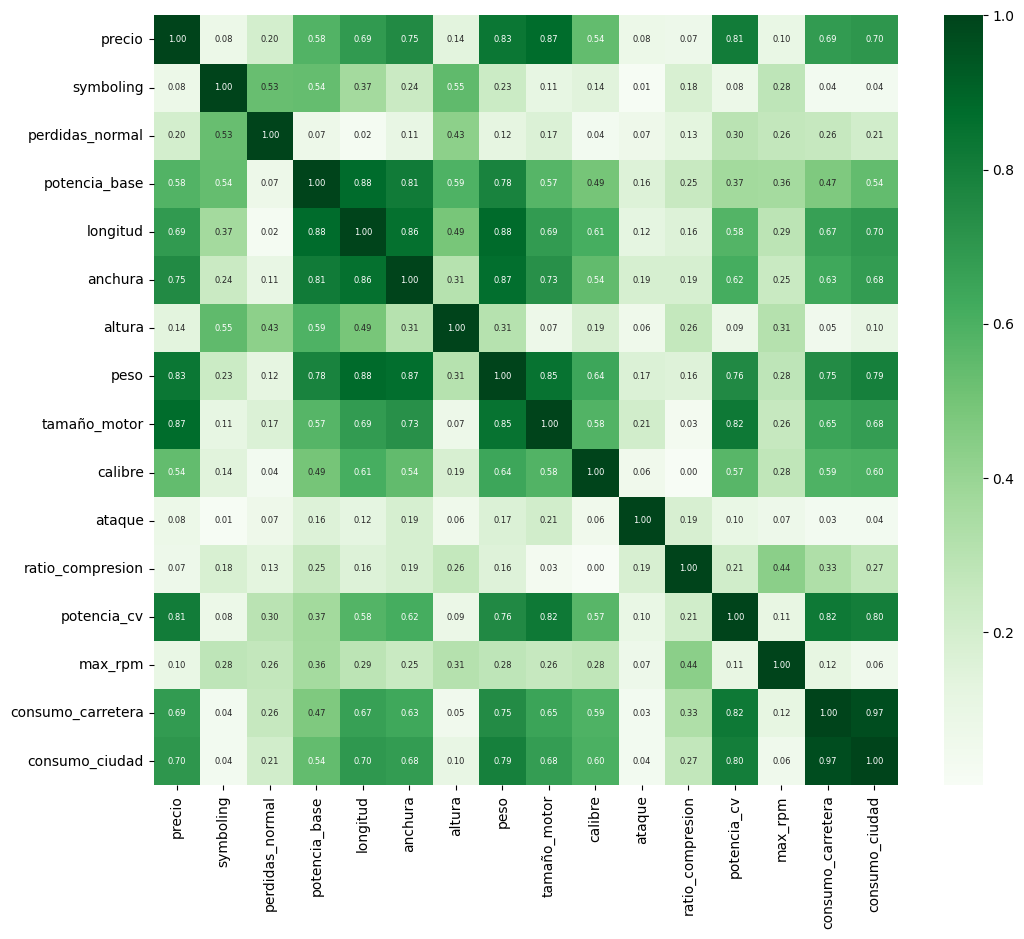

In [9]:
from matplotlib.colors import Colormap as cm

cols = autos.columns.tolist() # mover la columna precio al inicio del dataframe
cols.insert(0, cols.pop(cols.index("precio")))
autos = autos.reindex(columns=cols)

autos_matriz_correlaciones = autos.corr(numeric_only=True)

fig, ejes = plt.subplots(figsize=(12, 10))
absoluta = autos_matriz_correlaciones.abs()
sns.heatmap(absoluta, annot=True, annot_kws={'size': 6}, fmt=".2f", cmap="Greens")
plt.show()

Las características **longitud**, **anchura**, **peso** y **tamaño del motor** tienen una mayor correlación

Son candidatas a examinarlas en profundidad para eliminar algunas

A las características que tienen valores categóricos no podemos calcularles el coeficiente de correlación pero sí podemos hacerles otros test estadísticos como ANOVA (Análisis de la Varianza). Pero vamos simplemente a dibujar sus boxplot

#### Boxplot

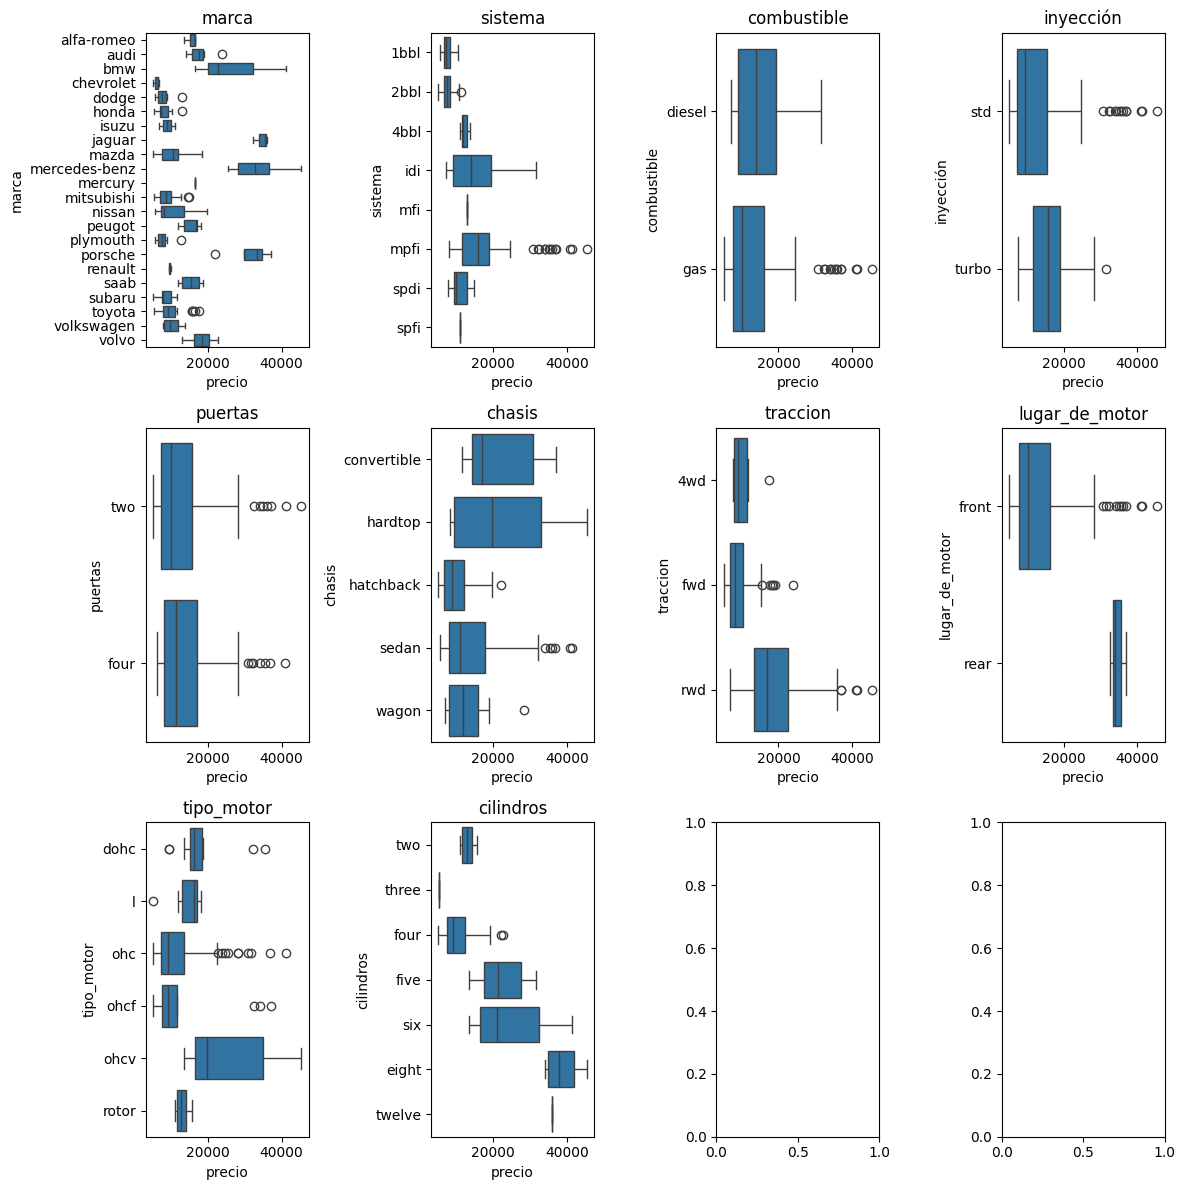

In [10]:
#Gráficos boxplot de categóricas con el target
n_categoricas = len(cols_categoricas)

fig, ejes = plt.subplots(n_categoricas // 4 + 1, 4, figsize=(12, 12))
ejes = ejes.flatten()

for i, col in enumerate(cols_categoricas):
    sns.boxplot(data=autos, x="precio", y=col, ax=ejes[i])
    ejes[i].set_title(col)

plt.tight_layout()
plt.show()

Hay variables categóricas que permiten distinguir entre grupos de valores de la variable objetivo, por ejemplo la variable "lugar_de_motor" los dos boxplots tienen diferencias significativas para cada valor, por lo que es una variable que sí aporta información al modelo.

La variable "puertas" no permite distinguir claramente grupos de valores del target, por lo que no es una variable que aporte información al modelo. Visualmente puedes identificar que la distribución de los boxplots son similares para ambos valores: two ó four

Detectamos en **lugar_de_motor** y **puertas** outliers y continuaremos trabajando con ellas

### INGENIERÍA DE CARACTERÍSTICAS

Aplicamos una **imputación simple sin hacer un análisis mas profundo de los datos**. Las variables
numéricas se imputan con la media y las categóricas con la moda. Usamos pipelines de
transformación porque nos dan flexibilidad y nos van a ahorrar mucho trabajo a la larga:

- OneHotEncoder para las variables categóricas nominales.
- OrdinalEncoder para las variables categóricas ordinales.

In [11]:
#Librerías de preprocesamiento de datos
from sklearn.pipeline import Pipeline
#Ingeniería de Características
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#Quitamos el precio de las predictoras
y = autos['precio']
X = autos.drop('precio', axis='columns')

#Distribuir columnas predictoras en 1 de estas categorías
cols_categoricas = ["marca", "combustible", "inyección", "chasis", "traccion", "lugar_de_motor", "tipo_motor", "sistema"]
cols_categoricas_ordinales = ["puertas", "cilindros"]
cols_todas = X.columns.tolist()
cols_numericas = [x for x in cols_todas if x not in cols_categoricas and x not in cols_categoricas_ordinales]

print("Predictoras ordinales:", cols_categoricas_ordinales)
print("Predictoras categóricas:", cols_categoricas)
print("Predictoras numéricas:", cols_numericas)

pipe_numericas = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
pipe_categoricas = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
pipe_categoricas_ordinales = Pipeline(steps=[
    ('ordenc', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan)),
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

preprocesa_columnas = ColumnTransformer(transformers=[
    ('numericas', pipe_numericas, cols_numericas),
    ('categoricas', pipe_categoricas, cols_categoricas),
    ('categoricas ordinales', pipe_categoricas_ordinales, cols_categoricas_ordinales)
])

Predictoras ordinales: ['puertas', 'cilindros']
Predictoras categóricas: ['marca', 'combustible', 'inyección', 'chasis', 'traccion', 'lugar_de_motor', 'tipo_motor', 'sistema']
Predictoras numéricas: ['symboling', 'perdidas_normal', 'potencia_base', 'longitud', 'anchura', 'altura', 'peso', 'tamaño_motor', 'calibre', 'ataque', 'ratio_compresion', 'potencia_cv', 'max_rpm', 'consumo_carretera', 'consumo_ciudad']


#### DIVIDIR EL DATASET EN TRAIN Y TEST

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print("Dimensiones de train:", x_train.shape)
print("Dimensiones de test: ", x_test.shape)

Dimensiones de train: (160, 25)
Dimensiones de test:  (41, 25)


#### BUSCAR UN BUEN MODELO DE REGRESIÓN

Si se tienen muchos modelos, realizar validación cruzada con todos es costoso, así que se deben ir descartando los modelos con menos desempeño hasta llegar al modelo final. Una forma de hacerlo:

Inicialmente se dividen los datos en dos partes: Una para realizar la selección del modelo
(datos de selección del modelo) y otra para realizar la prueba de desempeño (datos de test)

Esta parte de los datos se debe usar solo en el final de todo el proceso.

Luego se hace una evaluación de todos los modelos con la división anterior y se seleccionan los
mejores (es preferible usar modelos con principios de funcionamiento diferentes entre ellos)

Con lo mejores modelos (la cantidad depende de los resultados) se realiza la validación
cruzada (detectar si hay overfitting) para obtener los que tengan mejor resultado. Se saca el mejor o los mejores modelos (mejor desempeño y poca varianza) y se realiza optimización de hiperparámetros. Este proceso es costoso, por eso se debe realizar con muy pocos modelos


Luego se selecciona el mejor modelo (mejor desempeño y menor varianza) y se obtienen los
hiperparámetros que dieron el mejor resultado

Finalmente, se entrena el modelo seleccionado con los hiperparámetros encontrados con los
datos de selección de modelos y se hace la prueba con los datos de test

Creamos una función que se encargue de entrenar a un modelo. Esta función dividirá los datos que le
pasemos de nuevo en train y test. Aunque normalmente le pasaremos un x_train e y_train externo:

In [13]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures # Generar datos de potencias de los originales
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings("ignore")

dic_resultados = {}  # diccionario con resultados entrenamiento: (clave: {train_score, test_score},...}

def entrenar_modelo(modelo, procesador, X: pd.DataFrame, y: pd.Series, pct_test: float=0.2):
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=pct_test)
    pipe = Pipeline(steps=[("preprocessor", procesador), ("model", modelo)]) # entrenar
    modelo_entrenado = pipe.fit(x_train, y_train)
    train_score = modelo_entrenado.score(X=x_train, y=y_train)
    test_score = modelo_entrenado.score(X=x_test, y=y_test)
    return {'train_score': train_score, 'test_score': test_score}

In [14]:
def compara_resultados():  # función para comparar los resultados de los modelos
    for key in dic_resultados:
        print('Regresion:', key)
        print(f' train_score: {dic_resultados[key]["train_score"]:10.6f}')
        print(f' test_score: {dic_resultados[key]["test_score"]:10.6f}')
        print()

Ahora creamos y entrenamos varios modelos de regresión lineal con la función que hemos definido y registramos los score de cada uno en el diccionario creado a tal fin. Para el caso del modelo de regresión polinomial, vamos a generar características nuevas así que para automatizar el proceso,
creamos un pipeline que automatice este nuevo paso, de esta manera no tendremos que hacerlo nosotros manualmente:

In [15]:
dic_resultados['Dummy'] = entrenar_modelo(DummyRegressor(strategy='median'), preprocesa_columnas, x_train, y_train)
dic_resultados['Regresión Lineal'] = entrenar_modelo(LinearRegression(), preprocesa_columnas, x_train, y_train)

dic_resultados['Lasso'] = entrenar_modelo(Lasso(alpha=0.1), preprocesa_columnas, x_train, y_train)
dic_resultados['Ridge'] = entrenar_modelo(Ridge(alpha=0.1), preprocesa_columnas, x_train, y_train)

dic_resultados['Elasticnet'] = entrenar_modelo(ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, warm_start=True),
                                               preprocesa_columnas, x_train, y_train)

pipe_poli = Pipeline([('polynomial_features', PolynomialFeatures(degree=3, include_bias=False)),
                      ('linear_regressor', LinearRegression())])
dic_resultados['Polinomial'] = entrenar_modelo(pipe_poli, preprocesa_columnas, x_train, y_train)

dic_resultados['KNN'] = entrenar_modelo(KNeighborsRegressor(n_neighbors=5), preprocesa_columnas, x_train, y_train)
compara_resultados()

Regresion: Dummy
 train_score:  -0.131622
 test_score:  -0.155501

Regresion: Regresión Lineal
 train_score:   0.978437
 test_score: -48475104731634279120896.000000

Regresion: Lasso
 train_score:   0.978726
 test_score:   0.884432

Regresion: Ridge
 train_score:   0.978391
 test_score:   0.893741

Regresion: Elasticnet
 train_score:   0.945389
 test_score:   0.878613

Regresion: Polinomial
 train_score:   0.950849
 test_score: -3519992431654386794496.000000

Regresion: KNN
 train_score:   0.894794
 test_score:   0.729624



Ahora podemos dibujar. Pero antes una aclaración, el modelo etiquetado como “Dummy” es uno que
directamente devuelve siempre un valor fijo independientemente de la entrada, así que solamente acierta si se le aparece la virgen en un patinete

Como eso es improbable, es muy malo, en regresión similar a uno aleatorio. De
hecho, uno que sea peor que él, tiene mérito. Y sin embargo, uno de los que tenemos tiene tanto overfitting que es mucho peor, porque al menos el dummy da la mediana y no se aleja mucho en sus predicciones, tendrá un score negativo (coeficiente de determinación malo) pero no muy alto

Así que cuando ejecutes el código, el
modelo que de un score horrible es candidato a descartarlo (aunque si antes hubiésemos realizado limpieza de predictoras, selección de características formalmente hablando, el resultado podría cambiar)

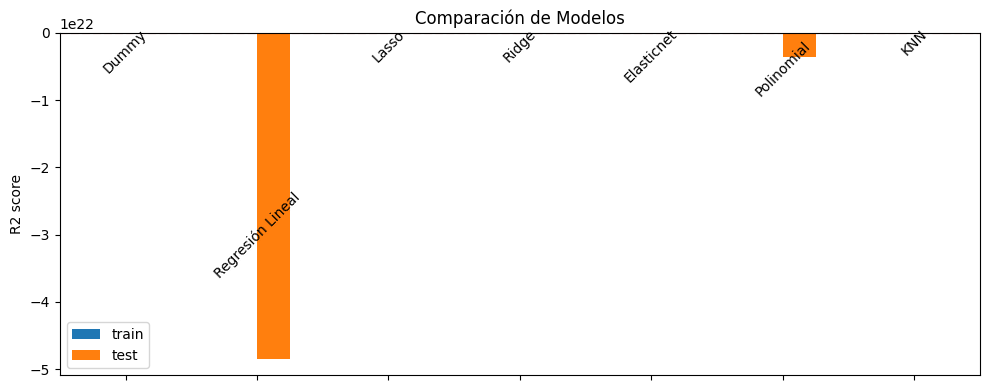

In [16]:
#Crear un diccionario solo con los resultados de prueba de cada modelo
nombre_modelos = dic_resultados.keys()

res_train = {} # crear diccionario vacio
res_test = {} # crear diccionario vacio

for nombre in nombre_modelos:
    res_train[nombre] = dic_resultados[nombre]['train_score']
    res_test[nombre] = dic_resultados[nombre]['test_score']

df_comparacion = pd.DataFrame([res_train, res_test], index=['train', 'test'])

#Dibujar un gráfico de barras
fig, ax = plt.subplots(figsize=(10, 4))
df_comparacion.T.plot(kind='bar', ax=ax)
ax.set_ylabel('R2 score')
ax.set_title('Comparación de Modelos')
ax.set_xticks(range(len(df_comparacion.columns)))
ax.set_xticklabels([])

#Dibujar etiquetas dentro de las barras rotadas 90 grados
for i, label in enumerate(df_comparacion.columns):
    bar_center = (df_comparacion.loc['train', label] + df_comparacion.loc['test', label]) / 2
    ax.text(i, bar_center, label, ha='center', va='center_baseline', rotation=45)

#Dibujar una línea del resultado del DummerRegressor
ax.axhline(df_comparacion['Dummy']['test'], color='red', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

### VALIDACIÓN CRUZADA

Analizar la varianza de los modelos más prometedores para obtener los que tengan mejor desempeño.

Aunque tu debes usar los 4 que hayas considerado mejores, yo te voy a mostrar el código de todos:

In [17]:
#========== Validación cruzada
# lista para almacenar cada uno los modelos seleccionados para CV
modelos = []

# Almacenando los modelos como una tupla (nombre, modelo)
modelos.append(('Regresión Lineal', LinearRegression()))
modelos.append(('Lasso', Lasso(alpha=0.1)))
modelos.append(('Ridge', Ridge(alpha=0.1)))
modelos.append(('Elastic_net', ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, warm_start=True)))
modelos.append(('Polinomial', pipe_poli))
modelos.append(('KN', KNeighborsRegressor(n_neighbors=5)))

Ahora vamos a definir estructuras que nos permitan realizar la CV con 10-Fold para cada modelo.

Yo voy a usar todos y eso hará que mis gráficos no sean muy buenos al tener dos modelos muy malos

(10-Fold CV de Regresión Lineal, media: -8.36815001956099e+22, desviación: 1.3780625098996992e+23)
(10-Fold CV de Lasso, media: 0.8513929695202247, desviación: 0.08660725434867603)
(10-Fold CV de Ridge, media: 0.8718775794902349, desviación: 0.07198185563989262)
(10-Fold CV de Elastic_net, media: 0.8806605238908036, desviación: 0.03794133762184975)
(10-Fold CV de Polinomial, media: -1.274234869846123e+22, desviación: 1.1986855612184017e+22)
(10-Fold CV de KN, media: 0.8008428109189982, desviación: 0.09690117008787878)


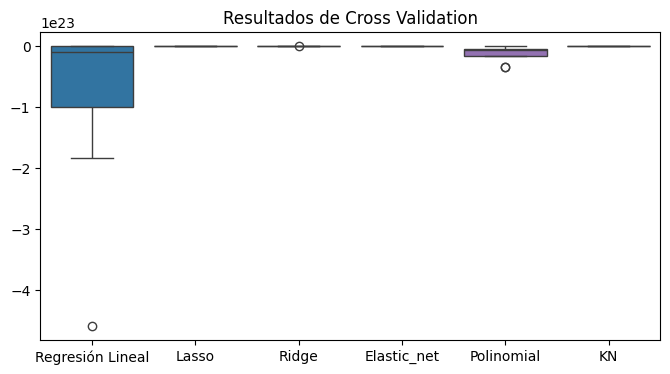

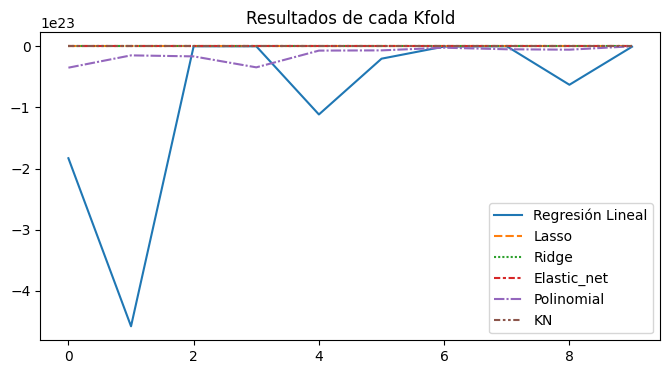

In [18]:
# Grabar los resultados de cada modelo
from sklearn import model_selection
seed = 123  #Semilla para obtener los mismos resultados de pruebas
resultados = []
nombres = []

for n, m in modelos:
    kfold = model_selection.KFold(n_splits=10)  #Kfold cross validation
    modelo_pipe = Pipeline(steps=[("preprocessor", preprocesa_columnas), ("model", m)])
    cv_resultados = model_selection.cross_val_score(estimator=modelo_pipe, X=x_train, y=y_train, cv=kfold, scoring="r2")
    resultados.append(cv_resultados)
    nombres.append(n)
    msg = f"(10-Fold CV de {n}, media: {cv_resultados.mean()}, desviación: {cv_resultados.std()})"
    print(msg)

plt.figure(figsize=(8, 4))
result_df = pd.DataFrame(resultados, index=nombres).T
sns.boxplot(data=result_df)
plt.title("Resultados de Cross Validation")
plt.show()

plt.figure(figsize=(8, 4))
sns.lineplot(data=result_df)
plt.title("Resultados de cada Kfold")
plt.show()

Comparación Estadística de Modelos

Ahora tras la validación cruzada vamos a usar los resultados para comprobar si hay o no una diferencia significativa entre los modelos considerados. Usaremos un test ANOVA de un factor:

In [19]:
# Comparación estadística de los modelos
from scipy.stats import f_oneway

model1 = result_df['Regresión Lineal']
model2 = result_df['Lasso']
model3 = result_df['Elastic_net']
model4 = result_df['Polinomial']
model5 = result_df['KNN']
model6 = result_df['Ridge']

estadistico, p_value = f_oneway(model1, model2, model3, model4, model5, model6)  #ANOVA de un factor
print(f'Estadístico: {estadistico}')
print(f'p_value: {p_value}')

# Un test de contraste de hipótesis con los datos obtenidos
alfa = 0.05  # nivel de significancia

if p_value < alfa:
    print("Existe una diferencia estadísticamente significativa en los resultados de "
          "cross-validation de los modelos.")
else:
    print("No Existe una diferencia estadísticamente significativa en los resultados de "
          "cross-validation de los modelos.")

KeyError: 'KNN'

En mi caso el test no es adecuado porque una de las condiciones que asume es que las desviaciones de todos los datos que participan en el el test son similares (homoscedasticidad) y en mi ejecución no se cumple al mantener los dos modelos que son rematadamente malos con una varianza excesiva respecto a los demás

### TUNING DE HIPERPARÁMETROS

Una vez tenemos dos modelos de muy diferente funcionamiento les ajustamos los hiperparámetros.

Para automatizar el proceso utilizo Grid search

En mi caso voy a hacerlos con Ridge y KNN para que veáis como hacerlo. En el diccionario de parámetros podéis incluir una entrada para cada hiperparámetro diferente que tenga el algoritmo de aprendizaje y una lista de valores que queréis probar. Lógicamente grid search probará las combinaciones de todos y eso lleva tiempo

In [ ]:
#----------=== Tuning de parámetros
from sklearn.model_selection import GridSearchCV

#=== Para Lasso
print("====== Tuning de Parámetros\n---- Para Lasso ----")
lasso_pipe = Pipeline(steps=[("preprocessor", preprocesa_columnas), ("model", Lasso())])
parametros = {'model__alpha': [0.01, 0.1, 0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]}
gs = GridSearchCV(estimator=lasso_pipe, param_grid=parametros, cv=5, return_train_score=True, scoring='r2')
gs.fit(x_train, y_train)

print(f"Mejor resultado = {gs.best_score_}")
print(f"Mejor std = {gs.cv_results_['std_test_score'][gs.best_index_]}")
print(f"Mejores parámetros = {gs.best_params_}")

#=== Para KNN
print("\n---- KNN ----")
knn_pipe = Pipeline(steps=[("preprocessor", preprocesa_columnas), ("model", KNeighborsRegressor())])
parametros = {'model__n_neighbors': [5, 10, 12, 14, 18, 20, 25, 30, 35, 50]}
gs1 = GridSearchCV(estimator=knn_pipe, param_grid=parametros, cv=5, return_train_score=True, scoring='r2')
gs1.fit(x_train, y_train)

print(f"Mejor resultado = {gs1.best_score_}")
print(f"Mejor std = {gs1.cv_results_['std_test_score'][gs1.best_index_]}")
print(f"Mejores parámetros = {gs1.best_params_}")

====== Tuning de Parámetros
---- Para Lasso ----
Mejor resultado = 0.8727305592747527
Mejor std = 0.041400995220250335
Mejores parámetros = {'model__alpha': 1.0}

---- KNN ----
Mejor resultado = 0.8072585381933148
Mejor std = 0.06129759146476002
Mejores parámetros = {'model__n_neighbors': 5}


#### ENTRENAR EL MEJOR MODELO CON LOS MEJORES HIPERPARÁMETROS

Una vez tengamos los mejores scores de nuestros mejores modelos, podemos comparar con qué
hiperparámetros de uno de ellos conseguimos el mejor puntuación. 

A igualdad de scores o valores similares nos quedaremos con el que sea más eficiente, escalable, etc. Pero si hay diferencias nos quedaremos con el mejor y sabiendo la mejor de sus configuraciones. Ahora solamente nos queda
entrenarlo con todos los datos:

R2: 0.6449337543632216


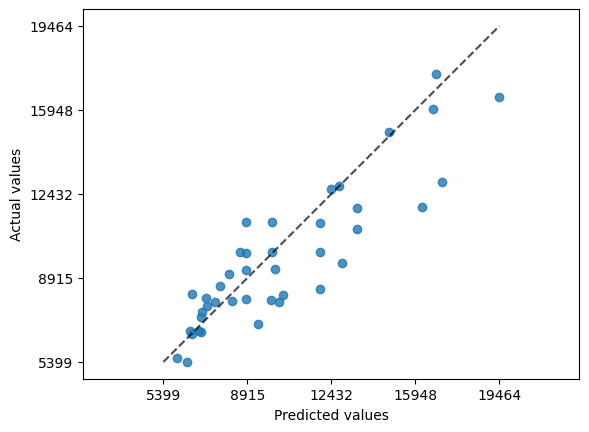

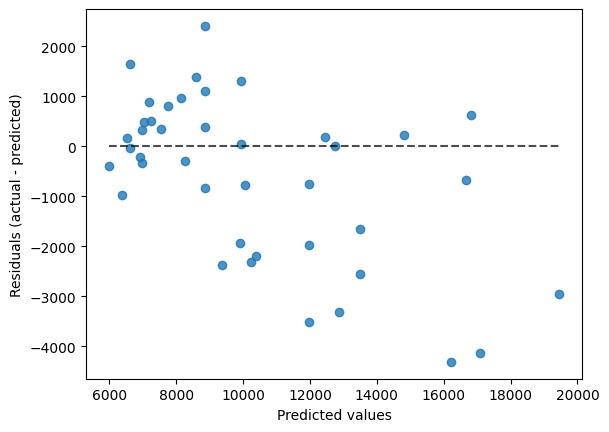

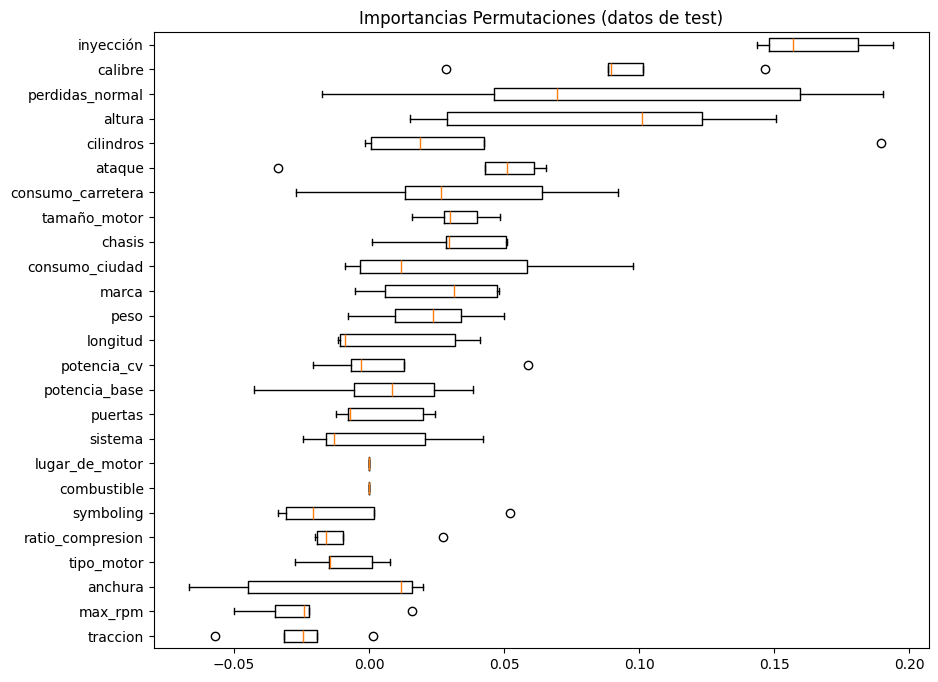

In [ ]:
#======= Entrenar, medir y Guardar el modelo ganador
#--- Suponiendo que haya sido el KNN

from sklearn import metrics
knn_pipe = Pipeline(steps=[("preprocessor", preprocesa_columnas),
                          ("model", KNeighborsRegressor(n_neighbors=gs1.best_params_['model__n_neighbors']))])

knn_pipe.fit(x_train, y_train)
y_pred = knn_pipe.predict(x_test)
print("R2:", metrics.r2_score(y_true=y_test, y_pred=y_pred))

from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred, kind="actual_vs_predicted")
plt.show()
PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred, kind="residual_vs_predicted")
plt.show()

from sklearn.inspection import permutation_importance
imps = permutation_importance(knn_pipe, x_test, y_test, n_repeats=5, scoring="r2", n_jobs=-1, random_state=123)
fig = plt.figure(figsize=(10, 8))
perm_sorted_idx = imps.importances_mean.argsort()
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False, labels=x_test.columns[perm_sorted_idx])
plt.title("Importancias Permutaciones (datos de test)")
plt.show()

Y una vez entrenado como necesitemos, lo guardaríamos para usarlo en alguna aplicación:


In [ ]:
from joblib import dump  # libreria de serializacion
dump(knn_pipe, 'modelo_ganador.joblib')

#... para usarlo más tarde en alguna aplicación.
from joblib import load
modelo = load('modelo_ganador.joblib')
datos_prueba = x_test[:1]
print(f"Predicción {modelo.predict(datos_prueba)}") # resultados de prediccion con el modelo

Predicción [6526.6]


#### APLICAR LO ANTERIOR (Está hecho en el V2)

ENTREGA 4: Entrega los ficheros u02_p03_a2_<alumno>.* y u02_p03_a2_<alumno>_v2 de manera que el de la segunda versión:

a) Cuando se genere el primer gráfico, busca una de las características que no tengan una
relación lineal con el target. La eliminas del DataFrame y de los arrays de nombres de columnas en el fichero _v2. Indica qué característica eliminas:

- Elimino **ratio_compresion**

b) Cuando aparezca la matriz de correlaciones, identifica las características que tengan menos del 0.2% de correlación lineal con el target y las eliminas del DataFrame en el nuevo fichero.

¿Cuáles son las variables que eliminas?

- Serían **max_rpm, altura, ataque, symboling y ratio_compresion**



c) Además, para eliminar colinealidad localiza todas las parejas (puedes ir bajando desde la primera a la última fila y buscar y eliminar correlaciones mayores de 0.8 que no sea con el target).

¿Qué columnas has eliminado?

- Podría eliminar **consumo_ciudad** o **consumo_carretera**. Elimino esta primera


d) En los diagramas boxplot de las columnas categóricas, elimina una o dos que no genere diferencias importantes entre sus valores (las identificas porque los boxplot de cada valor serán parecidos).

¿Cuáles eliminas?

- Elimino **inyección** y **combustible**


e) En el paso de "Buscar un buen modelo de regresión" descarta los 3 peores (aquellos que tengan peor R2 en los datos de test). Muestra captura de scores y el gráfico e indica los modelos que descartas

- Descarto los modelos de **Dummy**, **Polinomial** y **KNN**


f) En la validación cruzada, utiliza solamente los 3 mejores modelos del paso anterior. Muestra captura de resultados y escoge aquel que tenga menor varianza (es más estable)

- Me quedo con **Lasso** aunque **Ridge** también proporciona resultados muy parecidos


g) En el tunning de hiperparámetros, busca los parámetros que se puedan usar con el modelo con el que te has quedado (si das uno erróneo al grid search, el mensaje de error te dice los que puedes usar).

Indica captura de ejecución de esta fase y del entrenamiento del modelo elegido con los datos de train y test

- He usado GridSearch para obtener el mejor parámetro
- Mejor resultado = 0.8900538867590313
- Mejor std = 0.042113107209995546
- Mejores parámetros = {'model__alpha': 1.0}
- R2: 0.6601909731975597


h) Por último, analiza los errores que comete con el test mediante gráficos de predicciones vs valores reales, gráfico de residuos, y gráfico de test de permutaciones para estudiar la importancia de las predictoras en el modelo. Guarda el modelo en un fichero

- Está realizado en **modelo_final_lasso.ipynb**